# Axuste da paracondutividade

Temos bastantes gráficas que representar:

- Resistividade fronte a T
    - Enteira
    - Transición
    
- Regresión sen cutoff (para extraer o exponente)

    - Total cos datos marcados
        - Tc1
        - Tc2
    - Datos escollidos e liña
        - Tc1
        - Tc2
- Regresión con cutoff (para extraer c e lonxitude de coherencia)
    - Tc1
    - Tc2

In [14]:
from numpy import *
from matplotlib.pyplot import *
import scipy.optimize as so
rcParams.update({'figure.autolayout': True})


def regresion_simple(x,y):
    n=len(x);sx=sum(x);sy=sum(y);xx=dot(x,x);xy=dot(x,y);yy=dot(y,y)
    d=n*xx-sx**2
    a=(xx*sy-sx*xy)/d
    b=(n*xy-sx*sy)/d
    s=sqrt(sum((y-a-b*x)**2)/(n-2))
    sa=s*sqrt(xx/d)
    sb=s*sqrt(n/d)
    r=(n*xy-sx*sy)/sqrt(d*(n*yy-sy**2))
    return [a,b,s,sa,sb,r]

def regresion_ponderada(x,y,s):
    w=1./(s*s);sw=sum(w);wxx=sum(w*x*x)
    wx=dot(w,x);wy=sum(w*y);wxy=sum(w*x*y);wyy=sum(w*y*y)
    d=sw*wxx-wx**2
    a=(wy*wxx-wx*wxy)/d
    b=(sw*wxy-wx*wy)/d
    sa=sqrt(wxx/d);sb=sqrt(sw/d)
    n=len(x);s=sqrt(n*sum(w*(y-a-b*x)**2)/(n-2)/sw)
    r=(sw*wxy-wx*wy)/sqrt(d*(sw*wyy-wy**2))
    return[a,b,sa,sb,s,r]

### Datos!

In [15]:
rho=array([-2.22E-10, -2.15E-10, -2.19E-10, -2.33E-10, -2.05E-10, -2.22E-10, -2.32E-10, -2.26E-10, -2.14E-10, -2.12E-10, -2.24E-10, -2.41E-10, -2.31E-10, -2.35E-10, -2.30E-10, -2.39E-10, -2.37E-10, -2.14E-10, -2.38E-10, -2.44E-10, -2.40E-10, -2.51E-10, -2.26E-10, -2.04E-10, -2.30E-10, -2.24E-10, -2.29E-10, -2.22E-10, -2.34E-10, -2.37E-10, -2.20E-10, -2.57E-10, -2.26E-10, -2.26E-10, -2.42E-10, -2.44E-10, -2.38E-10, -2.38E-10, -2.20E-10, -2.37E-10, -2.36E-10, -2.42E-10, -2.21E-10, -2.23E-10, -2.21E-10, -2.16E-10, -2.34E-10, -2.33E-10, -2.28E-10, -2.29E-10, -2.21E-10, -2.02E-10, -1.94E-10, -2.08E-10, -2.10E-10, -2.18E-10, -2.16E-10, -1.98E-10, -1.41E-10, -4.84E-11, 9.66E-11, 3.48E-10, 7.09E-10, 1.21E-09, 1.98E-09, 3.09E-09, 4.80E-09, 7.25E-09, 1.21E-08, 2.31E-08, 5.12E-08, 1.03E-07, 1.73E-07, 2.43E-07, 3.02E-07, 3.45E-07, 3.75E-07, 3.97E-07, 4.12E-07, 4.22E-07, 4.30E-07, 4.36E-07, 4.41E-07, 4.45E-07, 4.49E-07, 4.52E-07, 4.55E-07, 4.58E-07, 4.60E-07, 4.63E-07, 4.65E-07, 4.68E-07, 4.70E-07, 4.72E-07, 4.75E-07, 4.77E-07, 4.79E-07, 4.81E-07, 4.83E-07, 4.85E-07, 4.88E-07, 4.90E-07, 4.92E-07, 4.94E-07, 4.96E-07, 4.98E-07, 5.00E-07, 5.02E-07, 5.04E-07, 5.06E-07, 5.08E-07, 5.10E-07, 5.11E-07, 5.13E-07, 5.15E-07, 5.17E-07, 5.19E-07, 5.21E-07, 5.23E-07, 5.25E-07, 5.27E-07, 5.29E-07, 5.31E-07, 5.32E-07, 5.34E-07, 5.36E-07, 5.38E-07, 5.40E-07, 5.42E-07, 5.43E-07, 5.45E-07, 5.47E-07, 5.49E-07, 5.51E-07, 5.53E-07, 5.54E-07, 5.56E-07, 5.58E-07, 5.60E-07, 5.61E-07, 5.63E-07, 5.65E-07, 5.67E-07, 5.68E-07, 5.70E-07, 5.72E-07, 5.74E-07, 5.76E-07, 5.78E-07, 5.80E-07, 5.81E-07, 5.83E-07, 5.85E-07, 5.87E-07, 5.89E-07, 5.91E-07, 5.93E-07, 5.95E-07, 5.97E-07, 6.00E-07, 6.02E-07, 6.05E-07, 6.07E-07, 6.10E-07, 6.14E-07, 6.16E-07, 6.18E-07, 6.21E-07, 6.23E-07, 6.26E-07, 6.28E-07, 6.31E-07, 6.33E-07, 6.36E-07, 6.38E-07, 6.41E-07, 6.43E-07, 6.46E-07, 6.48E-07, 6.51E-07, 6.53E-07, 6.56E-07, 6.58E-07, 6.61E-07, 6.64E-07, 6.66E-07, 6.69E-07, 6.71E-07, 6.74E-07, 6.76E-07, 6.79E-07, 6.81E-07, 6.84E-07, 6.86E-07, 6.89E-07, 6.91E-07, 6.94E-07, 6.96E-07, 6.99E-07, 7.01E-07, 7.04E-07, 7.07E-07, 7.09E-07, 7.12E-07, 7.14E-07, 7.16E-07, 7.18E-07, 7.21E-07, 7.23E-07, 7.25E-07, 7.28E-07, 7.30E-07, 7.32E-07, 7.35E-07, 7.37E-07, 7.40E-07, 7.43E-07, 7.45E-07, 7.48E-07, 7.51E-07, 7.54E-07, 7.56E-07, 7.59E-07, 7.61E-07, 7.63E-07, 7.66E-07, 7.68E-07, 7.70E-07, 7.73E-07, 7.75E-07, 7.77E-07, 7.79E-07, 7.81E-07, 7.83E-07, 7.86E-07, 7.88E-07, 7.90E-07, 7.92E-07, 7.95E-07, 7.97E-07, 7.99E-07, 8.02E-07, 8.04E-07, 8.06E-07, 8.08E-07, 8.10E-07, 8.12E-07, 8.15E-07, 8.17E-07, 8.19E-07, 8.21E-07, 8.23E-07, 8.26E-07, 8.28E-07, 8.30E-07, 8.32E-07, 8.35E-07, 8.37E-07, 8.39E-07, 8.41E-07, 8.43E-07, 8.46E-07, 8.48E-07, 8.50E-07, 8.52E-07, 8.54E-07, 8.56E-07, 8.59E-07, 8.61E-07, 8.63E-07, 8.65E-07, 8.67E-07, 8.69E-07, 8.71E-07, 8.74E-07, 8.76E-07, 8.78E-07, 8.80E-07, 8.82E-07, 8.84E-07, 8.87E-07, 8.89E-07, 8.91E-07, 8.93E-07, 8.95E-07, 8.97E-07, 8.99E-07, 9.02E-07, 9.04E-07, 9.06E-07, 9.08E-07, 9.10E-07, 9.12E-07, 9.14E-07, 9.16E-07, 9.18E-07, 9.20E-07, 9.22E-07, 9.24E-07, 9.26E-07, 9.28E-07, 9.30E-07, 9.32E-07, 9.34E-07, 9.36E-07, 9.38E-07, 9.40E-07, 9.42E-07, 9.44E-07, 9.46E-07, 9.48E-07, 9.49E-07, 9.51E-07, 9.53E-07, 9.55E-07, 9.57E-07, 9.59E-07, 9.61E-07, 9.63E-07, 9.64E-07, 9.66E-07, 9.68E-07, 9.70E-07, 9.72E-07, 9.74E-07, 9.75E-07, 9.77E-07, 9.79E-07, 9.81E-07, 9.82E-07, 9.84E-07, 9.86E-07, 9.88E-07, 9.89E-07, 9.91E-07, 9.93E-07, 9.95E-07, 9.96E-07, 9.98E-07, 1.00E-06, 1.00E-06, 1.00E-06, 1.00E-06, 1.01E-06, 1.01E-06, 1.01E-06, 1.01E-06, 1.01E-06, 1.01E-06, 1.02E-06, 1.02E-06, 1.02E-06, 1.02E-06, 1.02E-06, 1.02E-06, 1.03E-06, 1.03E-06, 1.03E-06, 1.03E-06, 1.03E-06, 1.03E-06, 1.04E-06, 1.04E-06, 1.04E-06, 1.04E-06, 1.04E-06, 1.04E-06, 1.04E-06, 1.05E-06, 1.05E-06, 1.05E-06, 1.05E-06, 1.05E-06, 1.05E-06, 1.05E-06, 1.06E-06, 1.06E-06, 1.06E-06, 1.06E-06, 1.06E-06, 1.06E-06, 1.06E-06, 1.07E-06, 1.07E-06, 1.07E-06, 1.07E-06, 1.07E-06, 1.07E-06, 1.07E-06, 1.08E-06, 1.08E-06, 1.08E-06, 1.08E-06, 1.08E-06, 1.08E-06, 1.08E-06, 1.08E-06, 1.09E-06, 1.09E-06, 1.09E-06, 1.09E-06, 1.09E-06, 1.09E-06, 1.09E-06, 1.09E-06, 1.10E-06, 1.10E-06, 1.10E-06, 1.10E-06, 1.10E-06, 1.10E-06, 1.10E-06, 1.10E-06, 1.10E-06, 1.11E-06, 1.11E-06, 1.11E-06, 1.11E-06, 1.11E-06, 1.11E-06, 1.11E-06, 1.11E-06, 1.11E-06, 1.12E-06, 1.12E-06, 1.12E-06, 1.12E-06, 1.12E-06, 1.12E-06, 1.12E-06, 1.12E-06, 1.12E-06, 1.12E-06, 1.13E-06, 1.13E-06, 1.13E-06, 1.13E-06, 1.13E-06, 1.13E-06, 1.13E-06, 1.13E-06, 1.13E-06, 1.13E-06, 1.14E-06, 1.14E-06, 1.14E-06, 1.14E-06, 1.14E-06, 1.14E-06, 1.14E-06, 1.14E-06, 1.14E-06, 1.14E-06, 1.15E-06, 1.15E-06, 1.15E-06, 1.15E-06, 1.15E-06, 1.15E-06, 1.15E-06, 1.15E-06, 1.15E-06, 1.15E-06, 1.15E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06])
T=array([84.47172, 84.42476, 84.38093, 84.28076, 84.25258, 84.1931, 84.09292, 84.05223, 83.98336, 83.92388, 83.88005, 83.81431, 83.7517, 83.69535, 83.68595, 83.60143, 83.55134, 83.49812, 83.47621, 83.45429, 83.39481, 83.35412, 83.34786, 83.30716, 83.3009, 83.26959, 83.21324, 83.2289, 83.20385, 83.18194, 83.17881, 83.16002, 83.14124, 83.16315, 83.16315, 83.16002, 83.17568, 83.15689, 83.20698, 83.21637, 83.21637, 83.25394, 83.27585, 83.31968, 83.40108, 83.39168, 83.45429, 83.48247, 83.56386, 83.62334, 83.69535, 83.76735, 83.82996, 83.92075, 83.9677, 84.05536, 84.11171, 84.23067, 84.33398, 84.44668, 84.49676, 84.62512, 84.72216, 84.83173, 84.95382, 85.09783, 85.22618, 85.35453, 85.4641, 85.59871, 85.80533, 85.90864, 86.10586, 86.26239, 86.42518, 86.59423, 86.77267, 86.95424, 87.13894, 87.31738, 87.5146, 87.72435, 87.92784, 88.13445, 88.32854, 88.54768, 88.77621, 88.97657, 89.18005, 89.39293, 89.64963, 89.86251, 90.10982, 90.33522, 90.61384, 90.81106, 91.05525, 91.33073, 91.57178, 91.82536, 92.07267, 92.33564, 92.61112, 92.88348, 93.14332, 93.44698, 93.71933, 93.99482, 94.28283, 94.57397, 94.86824, 95.18443, 95.45052, 95.74479, 96.07663, 96.34899, 96.67143, 97.00014, 97.31319, 97.57929, 97.92678, 98.22731, 98.55915, 98.88159, 99.19152, 99.51083, 99.87398, 100.1776, 100.5095, 100.8632, 101.2076, 101.5488, 101.8713, 102.2313, 102.5662, 102.9043, 103.2205, 103.5774, 103.9437, 104.263, 104.6199, 104.9768, 105.3493, 105.6999, 106.0599, 106.4356, 106.7799, 107.1431, 107.5407, 107.9414, 108.3108, 108.6833, 109.0496, 109.444, 109.8447, 110.2204, 110.6368, 111.0813, 111.4914, 111.9641, 112.3899, 112.8782, 113.3416, 113.8174, 114.4967, 114.9882, 115.5016, 116.0025, 116.4909, 116.9792, 117.4801, 117.981, 118.5257, 119.0704, 119.6152, 120.1286, 120.6733, 121.2243, 121.7596, 122.3137, 122.9022, 123.425, 123.9885, 124.5896, 125.1343, 125.7072, 126.2613, 126.8436, 127.4352, 127.9925, 128.5748, 129.132, 129.7425, 130.284, 130.8757, 131.4736, 132.0465, 132.6319, 133.2393, 133.8028, 134.4101, 134.9673, 135.584, 136.1882, 136.7361, 137.2244, 137.8005, 138.3671, 138.9525, 139.5035, 140.0451, 140.643, 141.1908, 141.7919, 142.3804, 142.9752, 143.5638, 144.1617, 144.7377, 145.3263, 145.9117, 146.4877, 147.0888, 147.6491, 148.2283, 148.7793, 149.3615, 149.9, 150.4572, 151.0333, 151.6218, 152.1415, 152.6956, 153.2685, 153.8069, 154.4362, 154.9871, 155.5444, 156.1173, 156.6901, 157.2568, 157.8046, 158.365, 158.9097, 159.5045, 160.0774, 160.5908, 161.1981, 161.7334, 162.2782, 162.8448, 163.377, 163.9718, 164.5228, 165.0424, 165.6122, 166.1506, 166.7235, 167.262, 167.8286, 168.3577, 168.9024, 169.4158, 169.9918, 170.5021, 171.0311, 171.5665, 172.1049, 172.6402, 173.1536, 173.7015, 174.2431, 174.7878, 175.2918, 175.8303, 176.3499, 176.8915, 177.3893, 177.9309, 178.4349, 178.9921, 179.493, 179.9845, 180.5417, 181.0708, 181.5435, 182.0913, 182.5828, 183.0681, 183.5971, 184.1105, 184.6083, 185.128, 185.5944, 186.111, 186.5993, 187.0783, 187.5385, 188.0237, 188.4996, 189.013, 189.4575, 189.9427, 190.4561, 190.8975, 191.4047, 191.8524, 192.2969, 192.7915, 193.2329, 193.7244, 194.1721, 194.6667, 195.13, 195.5276, 196.0035, 196.4762, 196.8925, 197.3371, 197.8004, 198.2481, 198.6644, 199.1152, 199.5284, 199.9949, 200.3956, 200.8214, 201.2596, 201.6948, 202.1612, 202.5494, 203.0002, 203.4041, 203.7891, 204.2243, 204.6375, 205.0664, 205.4514, 205.8803, 206.2497, 206.6473, 207.1044, 207.4769, 207.887, 208.2846, 208.6634, 209.0609, 209.4491, 209.8217, 210.1911, 210.5886, 210.933, 211.3243, 211.7344, 212.1257, 212.5045, 212.8489, 213.2246, 213.5908, 213.9696, 214.3547, 214.6959, 215.0684, 215.3909, 215.7259, 216.0765, 216.4553, 216.7902, 217.1283, 217.4915, 217.8108, 218.1677, 218.5308, 218.8533, 219.1632, 219.5138, 219.8237, 220.1556, 220.4905, 220.7879, 221.1292, 221.4516, 221.7521, 222.1028, 222.4002, 222.7383, 223.0231, 223.3143, 223.6524, 223.956, 224.2503, 224.5415, 224.8639, 225.1488, 225.4399, 225.7405, 226.0379, 226.3259, 226.5794, 226.9113, 227.1962, 227.4967, 227.7878, 228.0758, 228.3545, 228.6456, 228.9367, 229.1872, 229.4689, 229.7194, 229.998, 230.2923, 230.5803, 230.8213, 231.0718, 231.3379, 231.5914, 231.8513, 232.1268, 232.3678, 232.612, 232.875, 233.1254, 233.3571, 233.6263, 233.8924, 234.1334, 234.3526, 234.6312, 234.8628, 235.1196, 235.3512, 235.6267, 235.874, 236.1088, 236.3718, 236.594, 236.832, 237.0511, 237.2702, 237.5238, 237.7398, 237.9777, 238.1937, 238.4129, 238.6602, 238.8825, 239.0953, 239.3051, 239.5242, 239.7559, 239.9875, 240.1942, 240.4415, 240.6512, 240.8453, 241.0644, 241.2711, 241.5027, 241.678, 241.8878, 242.0881, 242.3198, 242.4763, 242.7174, 242.8927, 243.0868, 243.3028, 243.5219, 243.691, 243.8945, 244.0698, 244.267, 244.4517, 244.6646, 244.8211, 245.0434, 245.2312, 245.3564, 245.5599, 245.7477, 245.9105, 246.0984, 246.2831, 246.449, 246.665, 246.8403, 246.9718, 247.144, 247.313, 247.4914, 247.6824, 247.8452, 248.0205, 248.1676, 248.3336, 248.4713, 248.6529, 248.8376, 248.991, 249.135, 249.3103, 249.4606, 249.6296, 249.8018, 249.9427, 250.1117, 250.2651, 250.4279, 250.5875, 250.7316, 250.8599, 251.0227, 251.173, 251.3201, 251.4891, 251.605, 251.774, 251.9337, 252.0808, 252.228, 252.3845, 252.5379, 252.6568, 252.7883, 252.9292, 253.0982, 253.1828, 253.3612, 253.4739, 253.5929, 253.7337, 253.8684, 254.0155, 254.1532, 254.2597, 254.3849, 254.5602, 254.6979, 254.8263, 254.9703, 255.1425, 255.2395, 255.3648, 255.4806, 255.6152, 255.7342, 255.8625, 256.0065, 256.1317, 256.2851, 256.3884, 256.4855, 256.6107, 256.7422, 256.8737, 257.0271, 257.1617, 257.2681, 257.3871, 257.4904, 257.625, 257.7408, 257.8786, 258.0069, 258.1228, 258.2104, 258.3106, 258.4233, 258.5141, 258.6487, 258.7864, 258.8772, 258.9805, 259.0901, 259.1997, 259.2904, 259.3593, 259.5033, 259.6035, 259.7068, 259.8101, 259.8884, 260.0293, 260.12, 260.2202, 260.311, 260.4331, 260.5395, 260.6147, 260.7211, 260.862, 260.9684, 261.0561, 261.1406, 261.2408, 261.3472, 261.4443, 261.5507, 261.6384, 261.7354, 261.8324, 261.917, 262.0297, 262.0829, 262.2081, 262.3114, 262.4241, 262.5024, 262.59, 262.6871, 262.7622, 262.8311, 262.9657, 263.0408, 263.1222, 263.2537, 263.3195, 263.404, 263.4948, 263.5887, 263.6826, 263.7828, 263.8423, 263.9362, 264.0238, 264.0958, 264.2085, 264.3494, 264.4652, 264.5466, 264.6312, 264.7157, 264.8127, 264.9004, 265.0162, 265.1101, 265.2228, 265.2792, 265.3606, 265.4639, 265.5515, 265.6924, 266.5063, 266.5376, 266.641, 266.713, 266.785, 266.8726, 266.9665, 267.0072, 267.0761, 267.1418, 267.2107, 267.3015, 267.3485, 267.3766, 267.4549, 267.5112, 267.6177, 267.6803, 267.7523, 267.8024, 267.9213, 268.0278, 268.0841, 268.3784, 268.4942, 268.4567, 268.4222, 268.5349, 268.4755, 268.5068, 268.5318, 268.5913, 268.6946, 268.7854, 268.8292, 268.8762, 268.8449, 268.7666, 268.729, 268.7729, 268.8574, 268.9294, 268.9701, 269.0515, 269.0984, 269.1517, 269.161, 269.233, 269.3207, 269.3802, 269.4678, 269.5117, 269.5868, 269.6244, 269.6651, 269.7214, 269.8185, 269.8247, 269.8811, 269.9312, 270.0125, 270.0658])
sT=array([0.120358938, 0.120262213, 0.120171935, 0.119965612, 0.119907568, 0.119785055, 0.119578711, 0.119494901, 0.119353047, 0.119230534, 0.119140256, 0.11900485, 0.11887589, 0.118759824, 0.118740462, 0.118566374, 0.118463202, 0.118353583, 0.118308454, 0.118263305, 0.118140792, 0.118056981, 0.118044087, 0.117960256, 0.117947362, 0.117882872, 0.117766806, 0.117799062, 0.117747465, 0.117702337, 0.11769589, 0.117657187, 0.117618506, 0.117663634, 0.117663634, 0.117657187, 0.117689443, 0.11765074, 0.117753912, 0.117773253, 0.117773253, 0.117850637, 0.117895766, 0.117986044, 0.118153706, 0.118134345, 0.118263305, 0.118321348, 0.11848899, 0.118611502, 0.118759824, 0.118908124, 0.119037084, 0.119224087, 0.119320792, 0.119501348, 0.119617414, 0.11986244, 0.120075231, 0.120307362, 0.120410514, 0.120674901, 0.120874777, 0.121100462, 0.121351935, 0.121648557, 0.121912924, 0.12217729, 0.122402975, 0.122680236, 0.123105817, 0.123318608, 0.123724829, 0.124047239, 0.124382542, 0.12473074, 0.125098279, 0.125472264, 0.125852697, 0.126220236, 0.126626456, 0.127058485, 0.12747762, 0.127903181, 0.128302954, 0.128754324, 0.129225035, 0.129637723, 0.130056837, 0.130495313, 0.131024046, 0.131462522, 0.131971914, 0.132436178, 0.13301006, 0.133416281, 0.133919247, 0.134486662, 0.13498316, 0.135505467, 0.136014859, 0.136556507, 0.137123922, 0.137684911, 0.138220112, 0.13884557, 0.139406538, 0.139973974, 0.140567197, 0.141166868, 0.141772985, 0.142424252, 0.142972326, 0.143578443, 0.144261945, 0.144822933, 0.145487074, 0.146164128, 0.146808927, 0.147357022, 0.148072758, 0.14869177, 0.149375271, 0.150039411, 0.150677784, 0.151335477, 0.152083469, 0.152708845, 0.15339247, 0.154120997, 0.154830369, 0.15553315, 0.156197413, 0.156938917, 0.157628721, 0.158325117, 0.158976404, 0.159711522, 0.160466002, 0.161123675, 0.161858793, 0.162593912, 0.163361162, 0.164083304, 0.164824808, 0.165598649, 0.166307815, 0.167055909, 0.167874859, 0.168700194, 0.169461059, 0.170228309, 0.170982789, 0.171795147, 0.172620482, 0.173394323, 0.174251996, 0.175167547, 0.176012243, 0.176985878, 0.177862912, 0.17886868, 0.17982316, 0.18080318, 0.182202356, 0.183214715, 0.184272181, 0.185303901, 0.186309874, 0.187315642, 0.188347361, 0.189379081, 0.190501017, 0.191622954, 0.192745096, 0.193802562, 0.194924498, 0.196059411, 0.197161985, 0.198303283, 0.199515435, 0.200592263, 0.201752923, 0.202991028, 0.204112964, 0.205292984, 0.206434282, 0.207633664, 0.208852202, 0.21000009, 0.211199472, 0.212347155, 0.213604622, 0.214719967, 0.21593871, 0.217170224, 0.218350245, 0.219556012, 0.220807093, 0.221967752, 0.223218628, 0.224366311, 0.225636548, 0.226881038, 0.228009565, 0.229015332, 0.230201944, 0.231368988, 0.232574756, 0.233709668, 0.234825219, 0.236056733, 0.237185054, 0.238423159, 0.239635312, 0.24086044, 0.242072799, 0.243304313, 0.244490718, 0.245703077, 0.246908844, 0.24809525, 0.249333355, 0.250487423, 0.25168042, 0.252815332, 0.254014508, 0.255123674, 0.256271357, 0.257457969, 0.258670121, 0.259740564, 0.260881861, 0.262061882, 0.263170842, 0.264467031, 0.265601738, 0.266749627, 0.267929647, 0.269109462, 0.270276712, 0.271405033, 0.272559307, 0.273681243, 0.274906372, 0.276086393, 0.277143859, 0.278394735, 0.279497309, 0.280619451, 0.281786496, 0.282882685, 0.284107814, 0.285242726, 0.286312963, 0.287486599, 0.288595559, 0.289775579, 0.290884745, 0.292051789, 0.293141594, 0.29426353, 0.295320996, 0.296507402, 0.297558483, 0.298648082, 0.299750862, 0.300859822, 0.301962397, 0.303019863, 0.304148391, 0.305263942, 0.306385878, 0.307423983, 0.308533149, 0.309603385, 0.310718936, 0.311744271, 0.312859822, 0.313897927, 0.31504561, 0.31607733, 0.317089688, 0.318237371, 0.319327175, 0.320300811, 0.321429132, 0.32244149, 0.323441078, 0.324530677, 0.325588143, 0.326613478, 0.327683921, 0.32864458, 0.329708638, 0.330714405, 0.331701017, 0.332648905, 0.333648288, 0.334628514, 0.335685981, 0.336601532, 0.337600914, 0.33865838, 0.339567546, 0.340612242, 0.341534384, 0.342449935, 0.343468679, 0.344377845, 0.345390203, 0.346312345, 0.347331089, 0.348285363, 0.349104312, 0.350084539, 0.351058174, 0.351915641, 0.352831398, 0.353785672, 0.354707814, 0.35556528, 0.356493808, 0.357344889, 0.358305754, 0.359131089, 0.360008123, 0.360910697, 0.361807093, 0.362767752, 0.36356734, 0.364495867, 0.365327793, 0.36612079, 0.367017185, 0.367868267, 0.368751686, 0.369544683, 0.370428102, 0.371188967, 0.372007917, 0.37294942, 0.373716671, 0.374561367, 0.375380316, 0.376160543, 0.376979286, 0.377778874, 0.378546331, 0.379307196, 0.380125939, 0.380835311, 0.381641284, 0.382485981, 0.383291954, 0.38407218, 0.384781552, 0.385555393, 0.386309667, 0.387089894, 0.387883097, 0.388585878, 0.389353128, 0.390017391, 0.390707402, 0.391429544, 0.39220977, 0.392899575, 0.39359597, 0.394344065, 0.395001737, 0.395736856, 0.396484745, 0.397149008, 0.397787319, 0.398509461, 0.399147772, 0.399831398, 0.400521202, 0.401133766, 0.401836753, 0.402500811, 0.40311976, 0.403842108, 0.404454673, 0.405151068, 0.40573768, 0.406337474, 0.407033869, 0.407659204, 0.408265383, 0.408865177, 0.409529235, 0.410116053, 0.410715641, 0.411334796, 0.41194736, 0.412540563, 0.413062705, 0.413746331, 0.414333148, 0.414952098, 0.415551686, 0.416144889, 0.416718936, 0.417318524, 0.417918112, 0.418434075, 0.419014302, 0.419530265, 0.420104106, 0.420710285, 0.421303488, 0.421799884, 0.422315847, 0.422863941, 0.423386083, 0.423921408, 0.424488864, 0.42498526, 0.425488246, 0.426029956, 0.426545713, 0.427022953, 0.427577433, 0.428125527, 0.428621923, 0.429073416, 0.429647257, 0.430124291, 0.430653231, 0.431130265, 0.431697721, 0.432207093, 0.432690718, 0.433232427, 0.4336901, 0.434180316, 0.434631603, 0.435082891, 0.435605239, 0.436050141, 0.436540151, 0.436985054, 0.437436547, 0.437945919, 0.438403797, 0.438842108, 0.43927424, 0.439725527, 0.440202767, 0.440679801, 0.441105548, 0.44161492, 0.442046845, 0.44244664, 0.442897927, 0.443323673, 0.443800707, 0.444161779, 0.44459391, 0.445006475, 0.445483715, 0.445806063, 0.446302664, 0.446663735, 0.447063529, 0.447508431, 0.447959719, 0.44830802, 0.448727175, 0.449088246, 0.449494425, 0.449874858, 0.450313375, 0.450635723, 0.451093601, 0.451480419, 0.451738298, 0.452157453, 0.452544271, 0.452879595, 0.453266619, 0.453647051, 0.453988761, 0.454433663, 0.454794734, 0.455065589, 0.455420275, 0.45576837, 0.456135826, 0.456529235, 0.456864559, 0.45722563, 0.457528617, 0.457870532, 0.458154157, 0.458528205, 0.458908637, 0.4592246, 0.459521202, 0.459882273, 0.460191851, 0.460539945, 0.460894631, 0.461184848, 0.461532942, 0.461848905, 0.46218423, 0.462512963, 0.46280977, 0.463074034, 0.463409358, 0.463718936, 0.464021923, 0.464370017, 0.46460874, 0.464956835, 0.465285774, 0.465588761, 0.465891954, 0.466214302, 0.466530265, 0.466775167, 0.467046022, 0.467336238, 0.467684333, 0.467858586, 0.468226042, 0.468458174, 0.468703282, 0.468993292, 0.469270738, 0.469573725, 0.46985735, 0.470076712, 0.47033459, 0.470695661, 0.470979286, 0.471243756, 0.471540357, 0.471895043, 0.472094837, 0.472352922, 0.472591439, 0.472868679, 0.473113787, 0.47337805, 0.473674652, 0.47393253, 0.474248493, 0.474461264, 0.474661264, 0.474919142, 0.475189997, 0.475460852, 0.475776815, 0.476054054, 0.47627321, 0.476518318, 0.476731088, 0.477008328, 0.477246845, 0.477530677, 0.47779494, 0.478033663, 0.478214096, 0.478420481, 0.478652613, 0.478839636, 0.479116876, 0.479400501, 0.479587525, 0.479800295, 0.480026042, 0.480251789, 0.480438606, 0.480580522, 0.480877123, 0.481083509, 0.481296279, 0.481509049, 0.481670326, 0.481960543, 0.48214736, 0.482353746, 0.482540769, 0.482792263, 0.483011418, 0.48316631, 0.483385465, 0.483675682, 0.483894837, 0.484075476, 0.484249523, 0.484455908, 0.484675064, 0.484875064, 0.485094219, 0.485274858, 0.485474652, 0.485674446, 0.485848699, 0.486080831, 0.486190409, 0.486448287, 0.486661058, 0.486893189, 0.487054466, 0.487234899, 0.487434899, 0.487589585, 0.4877315, 0.48800874, 0.488163426, 0.488331088, 0.488601943, 0.488737474, 0.488911521, 0.489098545, 0.489291954, 0.489485362, 0.489691748, 0.489814302, 0.49000771, 0.490188143, 0.490336444, 0.490568576, 0.490858792, 0.491097309, 0.491264971, 0.491439224, 0.491613272, 0.491813066, 0.491993704, 0.492232221, 0.49242563, 0.492657762, 0.492773931, 0.492941593, 0.493154363, 0.493334796, 0.493625012, 0.495301428, 0.495365898, 0.495578874, 0.495727175, 0.495875476, 0.496055908, 0.496249317, 0.496333148, 0.496475064, 0.496610388, 0.496752304, 0.496939327, 0.497036135, 0.497094013, 0.49725529, 0.497371253, 0.497590615, 0.497719554, 0.497867855, 0.497971047, 0.498215949, 0.498435311, 0.498551274, 0.499157453, 0.49939597, 0.49931873, 0.499247669, 0.499479801, 0.499357453, 0.499421923, 0.499473416, 0.49959597, 0.49980874, 0.499995764, 0.50008598, 0.500182788, 0.500118318, 0.499957041, 0.499879595, 0.499970017, 0.500144065, 0.500292365, 0.500376197, 0.500543859, 0.50064046, 0.500750244, 0.500769399, 0.5009177, 0.501098339, 0.501220893, 0.501401325, 0.501491748, 0.501646433, 0.501723879, 0.50180771, 0.501923673, 0.502123673, 0.502136444, 0.502252613, 0.502355805, 0.502523261, 0.502633045])
srho=array([1.00698E-11, 1.24071E-11, 1.08879E-11, 6.2134E-12, 1.59129E-11, 1.00698E-11, 6.44713E-12, 8.55064E-12, 1.28745E-11, 1.34588E-11, 9.25181E-12, 3.52559E-12, 7.03143E-12, 5.6291E-12, 7.382E-12, 4.22676E-12, 4.81106E-12, 1.26408E-11, 4.57736E-12, 2.47385E-12, 3.64245E-12, 1.97386E-14, 8.66751E-12, 1.62635E-11, 7.382E-12, 9.25181E-12, 7.61574E-12, 9.83611E-12, 5.97966E-12, 4.81106E-12, 1.05373E-11, 1.96691E-12, 8.66751E-12, 8.55064E-12, 3.05815E-12, 2.35698E-12, 4.46049E-12, 4.34362E-12, 1.06542E-11, 4.92793E-12, 5.16166E-12, 3.05815E-12, 1.03035E-11, 9.71925E-12, 1.03035E-11, 1.19396E-11, 5.97966E-12, 6.09653E-12, 7.96634E-12, 7.49887E-12, 1.04204E-11, 1.68478E-11, 1.96525E-11, 1.4978E-11, 1.416E-11, 1.13553E-11, 1.21733E-11, 1.82501E-11, 3.78828E-11, 6.99029E-11, 1.19924E-10, 2.06765E-10, 3.31124E-10, 5.03988E-10, 7.68484E-10, 1.1536E-09, 1.74267E-09, 2.58864E-09, 4.24679E-09, 8.05564E-09, 1.77377E-08, 3.55448E-08, 5.98724E-08, 8.38149E-08, 1.04157E-07, 1.19076E-07, 1.29593E-07, 1.36957E-07, 1.42149E-07, 1.45828E-07, 1.4857E-07, 1.50692E-07, 1.52368E-07, 1.53792E-07, 1.55028E-07, 1.5609E-07, 1.57099E-07, 1.58037E-07, 1.58932E-07, 1.59797E-07, 1.60653E-07, 1.61455E-07, 1.62262E-07, 1.63067E-07, 1.63847E-07, 1.64604E-07, 1.65356E-07, 1.66109E-07, 1.66835E-07, 1.67572E-07, 1.68297E-07, 1.68987E-07, 1.69688E-07, 1.70411E-07, 1.71106E-07, 1.71817E-07, 1.72481E-07, 1.73182E-07, 1.73869E-07, 1.74562E-07, 1.7522E-07, 1.75895E-07, 1.76574E-07, 1.77229E-07, 1.77902E-07, 1.78561E-07, 1.7922E-07, 1.79889E-07, 1.80523E-07, 1.81186E-07, 1.81825E-07, 1.8248E-07, 1.83136E-07, 1.83747E-07, 1.84373E-07, 1.8501E-07, 1.85673E-07, 1.86316E-07, 1.8697E-07, 1.87614E-07, 1.88252E-07, 1.88889E-07, 1.8948E-07, 1.90129E-07, 1.90741E-07, 1.91324E-07, 1.91945E-07, 1.92555E-07, 1.93152E-07, 1.93728E-07, 1.94371E-07, 1.95004E-07, 1.95611E-07, 1.96235E-07, 1.96875E-07, 1.97522E-07, 1.98127E-07, 1.9877E-07, 1.99422E-07, 2.00067E-07, 2.00706E-07, 2.01317E-07, 2.01967E-07, 2.02629E-07, 2.03273E-07, 2.03913E-07, 2.04636E-07, 2.054E-07, 2.06217E-07, 2.07088E-07, 2.0789E-07, 2.08756E-07, 2.09645E-07, 2.10489E-07, 2.11786E-07, 2.12623E-07, 2.13471E-07, 2.14326E-07, 2.1517E-07, 2.16028E-07, 2.16851E-07, 2.17719E-07, 2.18585E-07, 2.19457E-07, 2.20316E-07, 2.21186E-07, 2.22054E-07, 2.22927E-07, 2.23801E-07, 2.24668E-07, 2.25558E-07, 2.26391E-07, 2.27266E-07, 2.28175E-07, 2.29033E-07, 2.29916E-07, 2.30763E-07, 2.31652E-07, 2.32552E-07, 2.33391E-07, 2.34261E-07, 2.35149E-07, 2.35995E-07, 2.36874E-07, 2.37751E-07, 2.38642E-07, 2.39505E-07, 2.40371E-07, 2.41261E-07, 2.42131E-07, 2.43002E-07, 2.43881E-07, 2.44746E-07, 2.45613E-07, 2.46467E-07, 2.47026E-07, 2.47934E-07, 2.48719E-07, 2.49586E-07, 2.50338E-07, 2.51135E-07, 2.51968E-07, 2.52816E-07, 2.53676E-07, 2.54549E-07, 2.55425E-07, 2.56285E-07, 2.57195E-07, 2.5815E-07, 2.59107E-07, 2.60118E-07, 2.61013E-07, 2.61936E-07, 2.6276E-07, 2.63521E-07, 2.64331E-07, 2.65133E-07, 2.6592E-07, 2.66696E-07, 2.67493E-07, 2.68337E-07, 2.69041E-07, 2.69702E-07, 2.70388E-07, 2.71131E-07, 2.71916E-07, 2.72696E-07, 2.73497E-07, 2.74305E-07, 2.75108E-07, 2.75941E-07, 2.76695E-07, 2.7745E-07, 2.78249E-07, 2.79012E-07, 2.79688E-07, 2.80399E-07, 2.81134E-07, 2.81894E-07, 2.82618E-07, 2.83427E-07, 2.84192E-07, 2.84975E-07, 2.85763E-07, 2.86495E-07, 2.87297E-07, 2.88041E-07, 2.88806E-07, 2.8958E-07, 2.90339E-07, 2.91091E-07, 2.91845E-07, 2.92588E-07, 2.9336E-07, 2.94101E-07, 2.94858E-07, 2.95584E-07, 2.96321E-07, 2.97072E-07, 2.9782E-07, 2.98543E-07, 2.99294E-07, 3.00049E-07, 3.00794E-07, 3.01548E-07, 3.02302E-07, 3.03036E-07, 3.03786E-07, 3.04528E-07, 3.05254E-07, 3.06005E-07, 3.06762E-07, 3.07497E-07, 3.08251E-07, 3.08996E-07, 3.09709E-07, 3.10453E-07, 3.11185E-07, 3.11904E-07, 3.1267E-07, 3.13379E-07, 3.14087E-07, 3.14776E-07, 3.15408E-07, 3.16122E-07, 3.16926E-07, 3.1763E-07, 3.18323E-07, 3.19004E-07, 3.19692E-07, 3.20377E-07, 3.21059E-07, 3.21738E-07, 3.22404E-07, 3.23077E-07, 3.23748E-07, 3.24419E-07, 3.25076E-07, 3.25734E-07, 3.26383E-07, 3.27054E-07, 3.27703E-07, 3.28385E-07, 3.29034E-07, 3.29631E-07, 3.30312E-07, 3.3096E-07, 3.31611E-07, 3.3223E-07, 3.32852E-07, 3.33509E-07, 3.34123E-07, 3.34744E-07, 3.35374E-07, 3.35993E-07, 3.36605E-07, 3.37209E-07, 3.37801E-07, 3.38419E-07, 3.39043E-07, 3.39639E-07, 3.40243E-07, 3.40852E-07, 3.41437E-07, 3.42056E-07, 3.42686E-07, 3.43287E-07, 3.43898E-07, 3.44483E-07, 3.45088E-07, 3.45676E-07, 3.4628E-07, 3.46853E-07, 3.47437E-07, 3.48028E-07, 3.48594E-07, 3.49181E-07, 3.49748E-07, 3.50295E-07, 3.50825E-07, 3.51383E-07, 3.51943E-07, 3.525E-07, 3.5307E-07, 3.53633E-07, 3.54155E-07, 3.54693E-07, 3.55235E-07, 3.55778E-07, 3.56296E-07, 3.56849E-07, 3.57375E-07, 3.57925E-07, 3.5843E-07, 3.58941E-07, 3.59456E-07, 3.59973E-07, 3.60475E-07, 3.60962E-07, 3.61457E-07, 3.61962E-07, 3.62455E-07, 3.62942E-07, 3.6344E-07, 3.63907E-07, 3.64423E-07, 3.6491E-07, 3.65401E-07, 3.65898E-07, 3.66366E-07, 3.6683E-07, 3.67294E-07, 3.67751E-07, 3.68281E-07, 3.68809E-07, 3.69312E-07, 3.69804E-07, 3.70291E-07, 3.70804E-07, 3.71274E-07, 3.71715E-07, 3.72174E-07, 3.72612E-07, 3.73041E-07, 3.73477E-07, 3.73892E-07, 3.74315E-07, 3.74758E-07, 3.75168E-07, 3.75591E-07, 3.76035E-07, 3.76468E-07, 3.76881E-07, 3.77294E-07, 3.77717E-07, 3.78124E-07, 3.7853E-07, 3.78947E-07, 3.79341E-07, 3.79749E-07, 3.80159E-07, 3.80564E-07, 3.80949E-07, 3.81347E-07, 3.81724E-07, 3.82097E-07, 3.82496E-07, 3.8286E-07, 3.83187E-07, 3.83536E-07, 3.83907E-07, 3.84277E-07, 3.84642E-07, 3.84953E-07, 3.85347E-07, 3.85705E-07, 3.86064E-07, 3.86424E-07, 3.86788E-07, 3.87147E-07, 3.87512E-07, 3.87855E-07, 3.88261E-07, 3.88612E-07, 3.88971E-07, 3.89325E-07, 3.89653E-07, 3.89993E-07, 3.90335E-07, 3.90687E-07, 3.90999E-07, 3.91343E-07, 3.91665E-07, 3.92006E-07, 3.92334E-07, 3.92666E-07, 3.93008E-07, 3.93323E-07, 3.93614E-07, 3.93962E-07, 3.94278E-07, 3.94617E-07, 3.94954E-07, 3.953E-07, 3.95615E-07, 3.95905E-07, 3.9626E-07, 3.9656E-07, 3.9683E-07, 3.97145E-07, 3.97442E-07, 3.97748E-07, 3.98064E-07, 3.98329E-07, 3.9862E-07, 3.98902E-07, 3.99196E-07, 3.99501E-07, 3.99792E-07, 4.0008E-07, 4.00357E-07, 4.00608E-07, 4.00902E-07, 4.01203E-07, 4.01493E-07, 4.01757E-07, 4.02033E-07, 4.02305E-07, 4.02561E-07, 4.02819E-07, 4.03089E-07, 4.03363E-07, 4.03615E-07, 4.03867E-07, 4.0413E-07, 4.04396E-07, 4.04667E-07, 4.04911E-07, 4.05154E-07, 4.05428E-07, 4.05676E-07, 4.05957E-07, 4.06192E-07, 4.06452E-07, 4.06674E-07, 4.06919E-07, 4.07154E-07, 4.0741E-07, 4.0763E-07, 4.07909E-07, 4.08147E-07, 4.08367E-07, 4.08612E-07, 4.08837E-07, 4.09098E-07, 4.09331E-07, 4.09559E-07, 4.09789E-07, 4.10026E-07, 4.10289E-07, 4.10484E-07, 4.10696E-07, 4.1093E-07, 4.11147E-07, 4.11359E-07, 4.11577E-07, 4.11821E-07, 4.12056E-07, 4.12249E-07, 4.12467E-07, 4.12694E-07, 4.129E-07, 4.13131E-07, 4.13354E-07, 4.13548E-07, 4.13753E-07, 4.13973E-07, 4.14155E-07, 4.14343E-07, 4.14529E-07, 4.14699E-07, 4.14916E-07, 4.15131E-07, 4.15329E-07, 4.15496E-07, 4.15678E-07, 4.15901E-07, 4.16114E-07, 4.16311E-07, 4.1652E-07, 4.16726E-07, 4.16951E-07, 4.17114E-07, 4.17277E-07, 4.17471E-07, 4.17669E-07, 4.17853E-07, 4.18049E-07, 4.18213E-07, 4.18407E-07, 4.18598E-07, 4.18789E-07, 4.18987E-07, 4.19154E-07, 4.19339E-07, 4.19525E-07, 4.19746E-07, 4.19922E-07, 4.20107E-07, 4.20281E-07, 4.20466E-07, 4.20654E-07, 4.20844E-07, 4.21054E-07, 4.21207E-07, 4.21399E-07, 4.21527E-07, 4.21683E-07, 4.21842E-07, 4.22009E-07, 4.22176E-07, 4.22355E-07, 4.22541E-07, 4.22672E-07, 4.22856E-07, 4.23031E-07, 4.2316E-07, 4.23282E-07, 4.23457E-07, 4.23615E-07, 4.23767E-07, 4.23909E-07, 4.24072E-07, 4.24221E-07, 4.24399E-07, 4.24557E-07, 4.24726E-07, 4.24863E-07, 4.24995E-07, 4.25182E-07, 4.25321E-07, 4.25487E-07, 4.2564E-07, 4.25803E-07, 4.25971E-07, 4.26107E-07, 4.2627E-07, 4.26389E-07, 4.26558E-07, 4.26714E-07, 4.26839E-07, 4.26992E-07, 4.27173E-07, 4.27331E-07, 4.27422E-07, 4.27576E-07, 4.27738E-07, 4.27893E-07, 4.28022E-07, 4.28178E-07, 4.28327E-07, 4.28429E-07, 4.28566E-07, 4.28721E-07, 4.28858E-07, 4.28963E-07, 4.29148E-07, 4.29266E-07, 4.29394E-07, 4.29516E-07, 4.29692E-07, 4.29809E-07, 4.29955E-07, 4.3008E-07, 4.3024E-07, 4.30368E-07, 4.30472E-07, 4.30625E-07, 4.30873E-07, 4.31038E-07, 4.31182E-07, 4.31304E-07, 4.31422E-07, 4.31613E-07, 4.31753E-07, 4.3194E-07, 4.32136E-07, 4.32281E-07, 4.32347E-07, 4.3246E-07, 4.3262E-07, 4.32755E-07, 4.33048E-07, 4.34455E-07, 4.34492E-07, 4.34609E-07, 4.34757E-07, 4.34904E-07, 4.35006E-07, 4.35104E-07, 4.35214E-07, 4.35302E-07, 4.35387E-07, 4.35493E-07, 4.35647E-07, 4.35667E-07, 4.35808E-07, 4.35894E-07, 4.36019E-07, 4.36157E-07, 4.36272E-07, 4.3633E-07, 4.36407E-07, 4.36623E-07, 4.36749E-07, 4.36895E-07, 4.37343E-07, 4.3758E-07, 4.37425E-07, 4.37349E-07, 4.37604E-07, 4.37492E-07, 4.37507E-07, 4.37491E-07, 4.37631E-07, 4.37775E-07, 4.37914E-07, 4.38004E-07, 4.38016E-07, 4.37953E-07, 4.37772E-07, 4.37706E-07, 4.37781E-07, 4.37914E-07, 4.38029E-07, 4.38124E-07, 4.38223E-07, 4.38309E-07, 4.38346E-07, 4.38417E-07, 4.38505E-07, 4.38642E-07, 4.38718E-07, 4.38859E-07, 4.38938E-07, 4.39022E-07, 4.39081E-07, 4.3919E-07, 4.3925E-07, 4.39383E-07, 4.39441E-07, 4.39503E-07, 4.39583E-07, 4.39676E-07, 4.39794E-07])


## Gráfica total

Text(0, 0.5, '$\\rho$ ($\\Omega$m)')

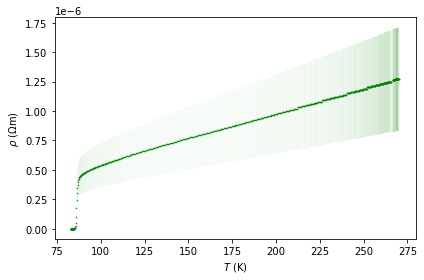

In [16]:
plot(T,rho,'g.',markersize=1)
errorbar(T,rho,yerr=srho,xerr=sT,linestyle='None',color='g', alpha=0.02)
xlabel('$T$ (K)')
ylabel('$\\rho$ ($\Omega$m)')

Apreciamos aquí que as incertezas son tan grandes que carecen realmente de sentido no contexto de avaliación dos resultados. Deixaremos de incluílas.

## Axuste lineal

Colleremos só os datos para as temperaturas moi afastadas da transición ($T>180K$!)

Para despois extrapolar a resistencia normal a temperaturas onde xa transicionou:
a=0.000000119960251 b=0.000000004267427 sa=0.000000001295405 sb=0.000000000005353 s=0.0000000027 r=0.999669739


(-1e-09, 6e-07)

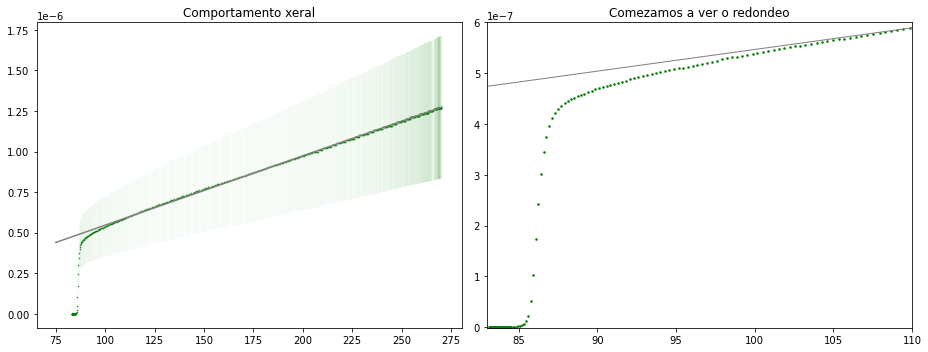

In [17]:
Taj=array([180.5417, 181.0708, 181.5435, 182.0913, 182.5828, 183.0681, 183.5971, 184.1105, 184.6083, 185.128, 185.5944, 186.111, 186.5993, 187.0783, 187.5385, 188.0237, 188.4996, 189.013, 189.4575, 189.9427, 190.4561, 190.8975, 191.4047, 191.8524, 192.2969, 192.7915, 193.2329, 193.7244, 194.1721, 194.6667, 195.13, 195.5276, 196.0035, 196.4762, 196.8925, 197.3371, 197.8004, 198.2481, 198.6644, 199.1152, 199.5284, 199.9949, 200.3956, 200.8214, 201.2596, 201.6948, 202.1612, 202.5494, 203.0002, 203.4041, 203.7891, 204.2243, 204.6375, 205.0664, 205.4514, 205.8803, 206.2497, 206.6473, 207.1044, 207.4769, 207.887, 208.2846, 208.6634, 209.0609, 209.4491, 209.8217, 210.1911, 210.5886, 210.933, 211.3243, 211.7344, 212.1257, 212.5045, 212.8489, 213.2246, 213.5908, 213.9696, 214.3547, 214.6959, 215.0684, 215.3909, 215.7259, 216.0765, 216.4553, 216.7902, 217.1283, 217.4915, 217.8108, 218.1677, 218.5308, 218.8533, 219.1632, 219.5138, 219.8237, 220.1556, 220.4905, 220.7879, 221.1292, 221.4516, 221.7521, 222.1028, 222.4002, 222.7383, 223.0231, 223.3143, 223.6524, 223.956, 224.2503, 224.5415, 224.8639, 225.1488, 225.4399, 225.7405, 226.0379, 226.3259, 226.5794, 226.9113, 227.1962, 227.4967, 227.7878, 228.0758, 228.3545, 228.6456, 228.9367, 229.1872, 229.4689, 229.7194, 229.998, 230.2923, 230.5803, 230.8213, 231.0718, 231.3379, 231.5914, 231.8513, 232.1268, 232.3678, 232.612, 232.875, 233.1254, 233.3571, 233.6263, 233.8924, 234.1334, 234.3526, 234.6312, 234.8628, 235.1196, 235.3512, 235.6267, 235.874, 236.1088, 236.3718, 236.594, 236.832, 237.0511, 237.2702, 237.5238, 237.7398, 237.9777, 238.1937, 238.4129, 238.6602, 238.8825, 239.0953, 239.3051, 239.5242, 239.7559, 239.9875, 240.1942, 240.4415, 240.6512, 240.8453, 241.0644, 241.2711, 241.5027, 241.678, 241.8878, 242.0881, 242.3198, 242.4763, 242.7174, 242.8927, 243.0868, 243.3028, 243.5219, 243.691, 243.8945, 244.0698, 244.267, 244.4517, 244.6646, 244.8211, 245.0434, 245.2312, 245.3564, 245.5599, 245.7477, 245.9105, 246.0984, 246.2831, 246.449, 246.665, 246.8403, 246.9718, 247.144, 247.313, 247.4914, 247.6824, 247.8452, 248.0205, 248.1676, 248.3336, 248.4713, 248.6529, 248.8376, 248.991, 249.135, 249.3103, 249.4606, 249.6296, 249.8018, 249.9427, 250.1117, 250.2651, 250.4279, 250.5875, 250.7316, 250.8599, 251.0227, 251.173, 251.3201, 251.4891, 251.605, 251.774, 251.9337, 252.0808, 252.228, 252.3845, 252.5379, 252.6568, 252.7883, 252.9292, 253.0982, 253.1828, 253.3612, 253.4739, 253.5929, 253.7337, 253.8684, 254.0155, 254.1532, 254.2597, 254.3849, 254.5602, 254.6979, 254.8263, 254.9703, 255.1425, 255.2395, 255.3648, 255.4806, 255.6152, 255.7342, 255.8625, 256.0065, 256.1317, 256.2851, 256.3884, 256.4855, 256.6107, 256.7422, 256.8737, 257.0271, 257.1617, 257.2681, 257.3871, 257.4904, 257.625, 257.7408, 257.8786, 258.0069, 258.1228, 258.2104, 258.3106, 258.4233, 258.5141, 258.6487, 258.7864, 258.8772, 258.9805, 259.0901, 259.1997, 259.2904, 259.3593, 259.5033, 259.6035, 259.7068, 259.8101, 259.8884, 260.0293, 260.12, 260.2202, 260.311, 260.4331, 260.5395, 260.6147, 260.7211, 260.862, 260.9684, 261.0561, 261.1406, 261.2408, 261.3472, 261.4443, 261.5507, 261.6384, 261.7354, 261.8324, 261.917, 262.0297, 262.0829, 262.2081, 262.3114, 262.4241, 262.5024, 262.59, 262.6871, 262.7622, 262.8311, 262.9657, 263.0408, 263.1222, 263.2537, 263.3195, 263.404, 263.4948, 263.5887, 263.6826, 263.7828, 263.8423, 263.9362, 264.0238, 264.0958, 264.2085, 264.3494, 264.4652, 264.5466, 264.6312, 264.7157, 264.8127, 264.9004, 265.0162, 265.1101, 265.2228, 265.2792, 265.3606, 265.4639, 265.5515, 265.6924, 266.5063, 266.5376, 266.641, 266.713, 266.785, 266.8726, 266.9665, 267.0072, 267.0761, 267.1418, 267.2107, 267.3015, 267.3485, 267.3766, 267.4549, 267.5112, 267.6177, 267.6803, 267.7523, 267.8024, 267.9213, 268.0278, 268.0841, 268.3784, 268.4942, 268.4567, 268.4222, 268.5349, 268.4755, 268.5068, 268.5318, 268.5913, 268.6946, 268.7854, 268.8292, 268.8762, 268.8449, 268.7666, 268.729, 268.7729, 268.8574, 268.9294, 268.9701, 269.0515, 269.0984, 269.1517, 269.161, 269.233, 269.3207, 269.3802, 269.4678, 269.5117, 269.5868, 269.6244, 269.6651, 269.7214, 269.8185, 269.8247, 269.8811, 269.9312, 270.0125, 270.0658])
rhoaj=array([8.93E-07, 8.95E-07, 8.97E-07, 8.99E-07, 9.02E-07, 9.04E-07, 9.06E-07, 9.08E-07, 9.10E-07, 9.12E-07, 9.14E-07, 9.16E-07, 9.18E-07, 9.20E-07, 9.22E-07, 9.24E-07, 9.26E-07, 9.28E-07, 9.30E-07, 9.32E-07, 9.34E-07, 9.36E-07, 9.38E-07, 9.40E-07, 9.42E-07, 9.44E-07, 9.46E-07, 9.48E-07, 9.49E-07, 9.51E-07, 9.53E-07, 9.55E-07, 9.57E-07, 9.59E-07, 9.61E-07, 9.63E-07, 9.64E-07, 9.66E-07, 9.68E-07, 9.70E-07, 9.72E-07, 9.74E-07, 9.75E-07, 9.77E-07, 9.79E-07, 9.81E-07, 9.82E-07, 9.84E-07, 9.86E-07, 9.88E-07, 9.89E-07, 9.91E-07, 9.93E-07, 9.95E-07, 9.96E-07, 9.98E-07, 1.00E-06, 1.00E-06, 1.00E-06, 1.00E-06, 1.01E-06, 1.01E-06, 1.01E-06, 1.01E-06, 1.01E-06, 1.01E-06, 1.02E-06, 1.02E-06, 1.02E-06, 1.02E-06, 1.02E-06, 1.02E-06, 1.03E-06, 1.03E-06, 1.03E-06, 1.03E-06, 1.03E-06, 1.03E-06, 1.04E-06, 1.04E-06, 1.04E-06, 1.04E-06, 1.04E-06, 1.04E-06, 1.04E-06, 1.05E-06, 1.05E-06, 1.05E-06, 1.05E-06, 1.05E-06, 1.05E-06, 1.05E-06, 1.06E-06, 1.06E-06, 1.06E-06, 1.06E-06, 1.06E-06, 1.06E-06, 1.06E-06, 1.07E-06, 1.07E-06, 1.07E-06, 1.07E-06, 1.07E-06, 1.07E-06, 1.07E-06, 1.08E-06, 1.08E-06, 1.08E-06, 1.08E-06, 1.08E-06, 1.08E-06, 1.08E-06, 1.08E-06, 1.09E-06, 1.09E-06, 1.09E-06, 1.09E-06, 1.09E-06, 1.09E-06, 1.09E-06, 1.09E-06, 1.10E-06, 1.10E-06, 1.10E-06, 1.10E-06, 1.10E-06, 1.10E-06, 1.10E-06, 1.10E-06, 1.10E-06, 1.11E-06, 1.11E-06, 1.11E-06, 1.11E-06, 1.11E-06, 1.11E-06, 1.11E-06, 1.11E-06, 1.11E-06, 1.12E-06, 1.12E-06, 1.12E-06, 1.12E-06, 1.12E-06, 1.12E-06, 1.12E-06, 1.12E-06, 1.12E-06, 1.12E-06, 1.13E-06, 1.13E-06, 1.13E-06, 1.13E-06, 1.13E-06, 1.13E-06, 1.13E-06, 1.13E-06, 1.13E-06, 1.13E-06, 1.14E-06, 1.14E-06, 1.14E-06, 1.14E-06, 1.14E-06, 1.14E-06, 1.14E-06, 1.14E-06, 1.14E-06, 1.14E-06, 1.15E-06, 1.15E-06, 1.15E-06, 1.15E-06, 1.15E-06, 1.15E-06, 1.15E-06, 1.15E-06, 1.15E-06, 1.15E-06, 1.15E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.16E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.17E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.18E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.19E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.20E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.21E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.22E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.23E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.24E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.25E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.26E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06, 1.27E-06])

a,b,s,sa,sb,r=regresion_simple(Taj,rhoaj)

Tlin=linspace(75,270.5,1000)
fT=a+b*Tlin

#GRÁFICA AXUSTE
figura, eixos = subplots(1,2,figsize=(13,5))

subplot(1,2,1)
plot(T,rho,'g.',markersize=1)
plot(Tlin,fT,color='grey', ls='-')
errorbar(T,rho,yerr=srho,xerr=sT,linestyle='None',color='g', alpha=0.02)
title('Comportamento xeral')
#xlim(83.3,110);ylim(-0.000000001,0.0000006)
#savefig('rhoT_nuevo.png')
print('Para despois extrapolar a resistencia normal a temperaturas onde xa transicionou:')
print('a=%.15f b=%.15f sa=%.15f sb=%.15f s=%.10f r=%.9f'%(a,b,sa,sb,s,r))

subplot(1,2,2)
plot(T,rho,'g.',markersize=3)
plot(Tlin,fT,color='grey', ls='-', lw=1)
#errorbar(T,rho,yerr=srho,xerr=sT,linestyle='None',color='g',alpha=0.1)
title('Comezamos a ver o redondeo')
xlim(83,110);ylim(-0.000000001,0.0000006)
#savefig('rhoT_nuevo.png')



## Paracondutividade

Agora calcularemos a paracondutividade seguindo $\Delta\sigma=\frac{1}{\rho}-\frac{1}{\rho_n}$.

Para isto faranos falta obter $\rho_n$ para os datos de temperatura que medimos nós.

Escolleremos as temperaturas maiores cá temperatura crítica e as fluctuacións positivas. Eliminamos os ceros que sobren. 

In [18]:
rhon=a+b*T
srhon=sqrt(sa**2+T**2*sb**2)

fluc=(1/rho)-(1/rhon)
sfluc=sqrt((srho/rho**2)**2+(srhon/rhon**2)**2)



### Tc1

$T_{c1}=85.856985\mathrm{K}$



In [19]:
Tc=ones(len(T))*85.856985
Tprueba=zeros(len(T))
flucprueba=zeros(len(fluc))
sflucprueba=zeros(len(sfluc))

#escojo las T>Tc y las fluctuaciones positivas
for i in range(len(T)-1):
    if 2*Tc[i]>T[i]>Tc[i] and fluc[i]>0:
        Tprueba[i]=T[i]
        flucprueba[i]=fluc[i]
        sflucprueba[i]=sfluc[i]

#quito los zeros para hacer el ajuste
Tflucaj=Tprueba[Tprueba!=0]
flucaj=flucprueba[flucprueba!=0]
sflucaj=sflucprueba[sflucprueba!=0]

Tc=ones(len(Tflucaj))*85.856985

Agora realizamos o axuste dos logaritmos: teremos unha ecuación tal que $$log_{10}(\Delta\sigma)=log_{10}\left(\frac{e^2}{32\hslash^2\xi(0)}\right)-\frac{1}{2}log_{10}(\epsilon)$$

In [20]:
x=log10((Tflucaj-Tc)/Tc)
y=log10(flucaj)
sy=sflucaj/(flucaj*log(10))

In [21]:
#creo vector cos primeiros puntos (comportamento non linear) para plotealos.
#elimino estes puntos porque non son lineares.

xprim=ones(11)
yprim=ones(11)
syprim=ones(11)

for i in range(10,-1,-1):
    xprim[i]=x[i]
    yprim[i]=y[i]
    syprim[i]=sy[i]
    x=delete(x,i)
    y=delete(y,i)
    sy=delete(sy,i)
    

    
#facemos o mesmo cos últimos puntos

ylast=ones(60)
xlast=ones(60)
sylast=ones(60)
j=0


for i in range(len(x),12,-1):
    xlast[i-(72-2*j)]=x[i-1]
    ylast[i-(72-2*j)]=y[i-1]
    sylast[i-(72-2*j)]=sy[i-1]
    x=delete(x,i-1)
    y=delete(y,i-1)
    sy=delete(sy,i-1)
    j=j+1
    

#quito el ultimo punto porque es un valor de la fluctuacion bajo y me jode la gráfica

xlast=delete(xlast,0)
ylast=delete(ylast,0)
sylast=delete(sylast,0)



Representamos:

Para o exponente 0.5:
a=4.200737945 b=-0.737267183 sa=4.847343233 sb=0.003332240 s=7.133364512 r=0.999669739
xi0= 4.791336428015042e-10
sxi_0= 5.347811952110343e-09


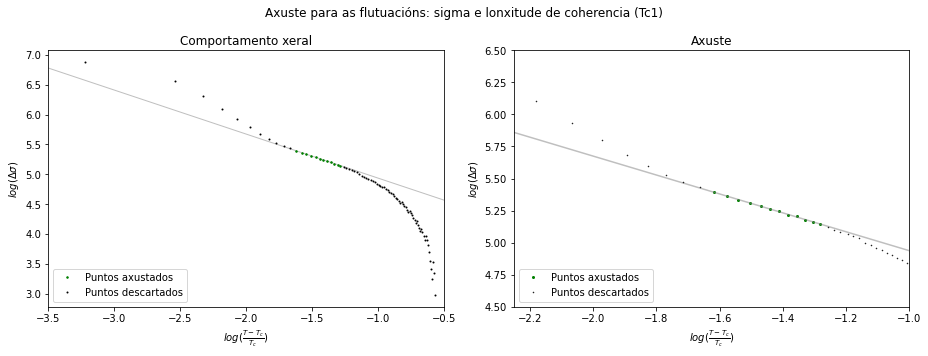

In [26]:
a,exp,saj,sa,sexp,raj=regresion_ponderada(x,y,sy)

print('Para o exponente 0.5:')
print('a=%.9f b=%.9f sa=%.9f sb=%.9f s=%.9f r=%.9f'%(a,exp,sa,sexp,saj,r))


xaj=linspace(-3.5,-0,1000)
yaj=a+exp*xaj


figura2, eixos2= subplots(1,2,figsize=(13,5))

subplot(1,2,1)
xlabel('$log(\\frac{T-T_c}{T_c})$')
ylabel('$log(\Delta \sigma)$')
xlim(-3.5, -0.5)


plot(xaj,yaj,color='grey',ls='-', lw=1, alpha=0.5)

plot(x,y,'g.',markersize=3,label='Puntos axustados')
#errorbar(x,y,yerr=sy,linestyle='none', color='g',alpha=0.1)

plot(xprim,yprim,'k.',markersize=2, label= u'Puntos descartados')
plot(xlast,ylast,'k.',markersize=2)

legend(loc='lower left')
title('Comportamento xeral')



#Graficamos simplemente os datos axustados

subplot(1,2,2)
xlabel('$log(\\frac{T-T_c}{T_c})$')
ylabel('$log(\Delta \sigma)$')
xlim(-2.25, -1)
ylim(4.5, 6.5)


xaj=linspace(-2.5,-0.6,1000)
yaj=a+exp*xaj


plot(x,y,'g.',markersize=4,label='Puntos axustados')
#errorbar(x,y,yerr=sy,linestyle='none', color='g',alpha=0.1)


plot(xaj,yaj,color='grey', ls='-', alpha=0.5)

plot(xprim,yprim,'k.',markersize=1, label= u'Puntos descartados')
plot(xlast,ylast,'k.',markersize=1)

legend(loc='lower left')
title('Axuste')

suptitle(u'Axuste para as flutuacións: sigma e lonxitude de coherencia (Tc1)')
#savefig('metodo1_incert.png')

q=1.602176565E-19
h=1.054571817E-34
xi_0=q**2/(32*h*10**a)
print('xi0=',xi_0)
sxi_0=sa*xi_0*log(10)
print('sxi_0=', sxi_0)


## Cutoff

Agora usaremos a expresión utilizando o cutoff en enerxía total para ver como (e se) se axusta mellor aos datos experimentais.

sc= 0.9045440267325779
xi_0= 1.2650039785807872e-10 +- 2.0147690398175868e-10


<ipython-input-27-9981051e84b8>:26: RuntimeWarning: invalid value encountered in sqrt
  y =(q**2/(16*pi*h*xi)*(arctan(sqrt((c-x)/x))/sqrt(x)-sqrt(c-x)/c))


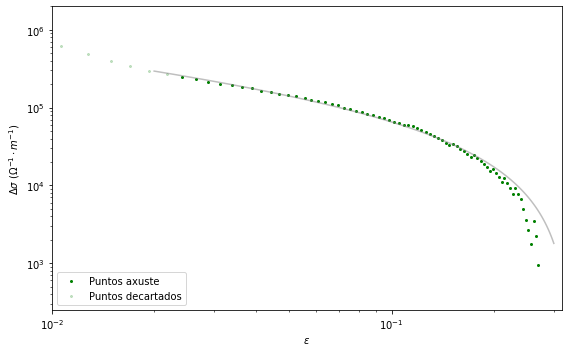

In [27]:
#Metemos el CUTOFF en energia total non só para os puntos lineais (pero si descartamos algúns dos non lineais).
#Hai que recuperar os vectores iniciais e volvelos editar


x=(Tflucaj-Tc)/Tc
y=flucaj
sy=sflucaj

xprim=ones(11)
yprim=ones(11)
syprim=ones(11)

for i in range(10,-1,-1):
    xprim[i]=x[i]
    yprim[i]=y[i]
    syprim[i]=sy[i]
    x=delete(x,i)
    y=delete(y,i)
    sy=delete(sy,i)

        

#Hagamos el ajuste dejando como parámetros libres xi(0) y c
   
def fun(x,xi,c):
    y =(q**2/(16*pi*h*xi)*(arctan(sqrt((c-x)/x))/sqrt(x)-sqrt(c-x)/c))
    return y

par=[1E-10,100]


sol = so.curve_fit(fun,x,y,p0=(par),sigma=sy,absolute_sigma=True,maxfev=10000)
xi_02,c=sol[0]
sxi_02,s=np.sqrt(np.diag(sol[1]))   

print('sc=',s)
print('xi_0=', xi_02, '+-',sxi_02)

xaj=linspace(0.02,0.3,100)
yaj=(q**2/(16*pi*h*xi_02)*(arctan(sqrt((c-xaj)/xaj))/sqrt(xaj)-sqrt(c-xaj)/c))


figure(figsize=(8,5))

plot(x,y,'g.',markersize=4,label='Puntos axuste')
plot(xprim,yprim,'g.',alpha=0.2,markersize=4, label= u'Puntos descartados')
plot(xlast,ylast,'g.',alpha=0.2,markersize=4)

loglog(xaj,yaj,color='grey', alpha=0.5, ls='-') #representación logarítmica para ver mellor as escalas.


xlim(10**(-2),10**(-0.5))
ylim(2.5*10**2,2*10**6)
xlabel('$\epsilon$')
ylabel('$\Delta\sigma$ ($\Omega^{-1}\cdot m^{-1}$)')
legend(loc='lower left')

#Omito errorbar porque son ridiculamente grandes.
#savefig('cutoff1.png')

